In [1]:
#importing the libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns

In [2]:
#importing the libraries
from sklearn.decomposition import PCA

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [3]:
#reading csv file as df
df=pd.read_csv('C:\\Users\\MERINA ANGEL\\Downloads\\Country-data.csv')

In [4]:
df #printing df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [5]:
df.head() #printing first 5 rows

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

the export, import, health are in percentage format converting them to actual values

In [6]:
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [7]:
df.isnull().sum() #printing null values

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
#5 point summary of numerical columns
df.describe()

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.733204    6588.352108   17144.688623   
std     40.328931   17973.885795  1801.408906   14710.810418   19278.067698   
min      2.600000       1.076920    12.821200       0.651092     609.000000   
25%      8.250000     447.140000    78.535500     640.215000    3355.000000   
50%     19.300000    1777.440000   321.886000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [9]:
#percentile values for numerical columns
df.describe(percentiles=[.25,.50,.75,.100])

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.733204    6588.352108   17144.688623   
std     40.328931   17973.885795  1801.408906   14710.810418   19278.067698   
min      2.600000       1.076920    12.821200       0.651092     609.000000   
10%      4.200000     110.224800    36.502560     211.005600    1524.000000   
25%      8.250000     447.140000    78.535500     640.215000    3355.000000   
50%     19.300000    1777.440000   321.886000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
10%      0.587800   57.820000    1.452000     593.800000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [10]:
#printing the information of non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# data visualization

<AxesSubplot:>

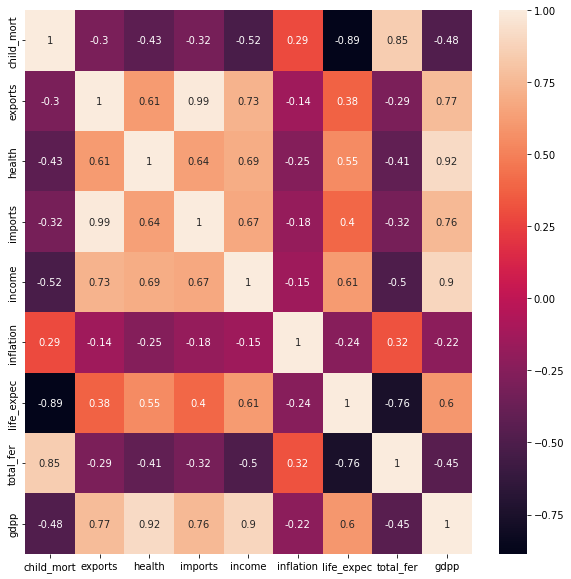

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(),annot=True) #visualizing the correlation

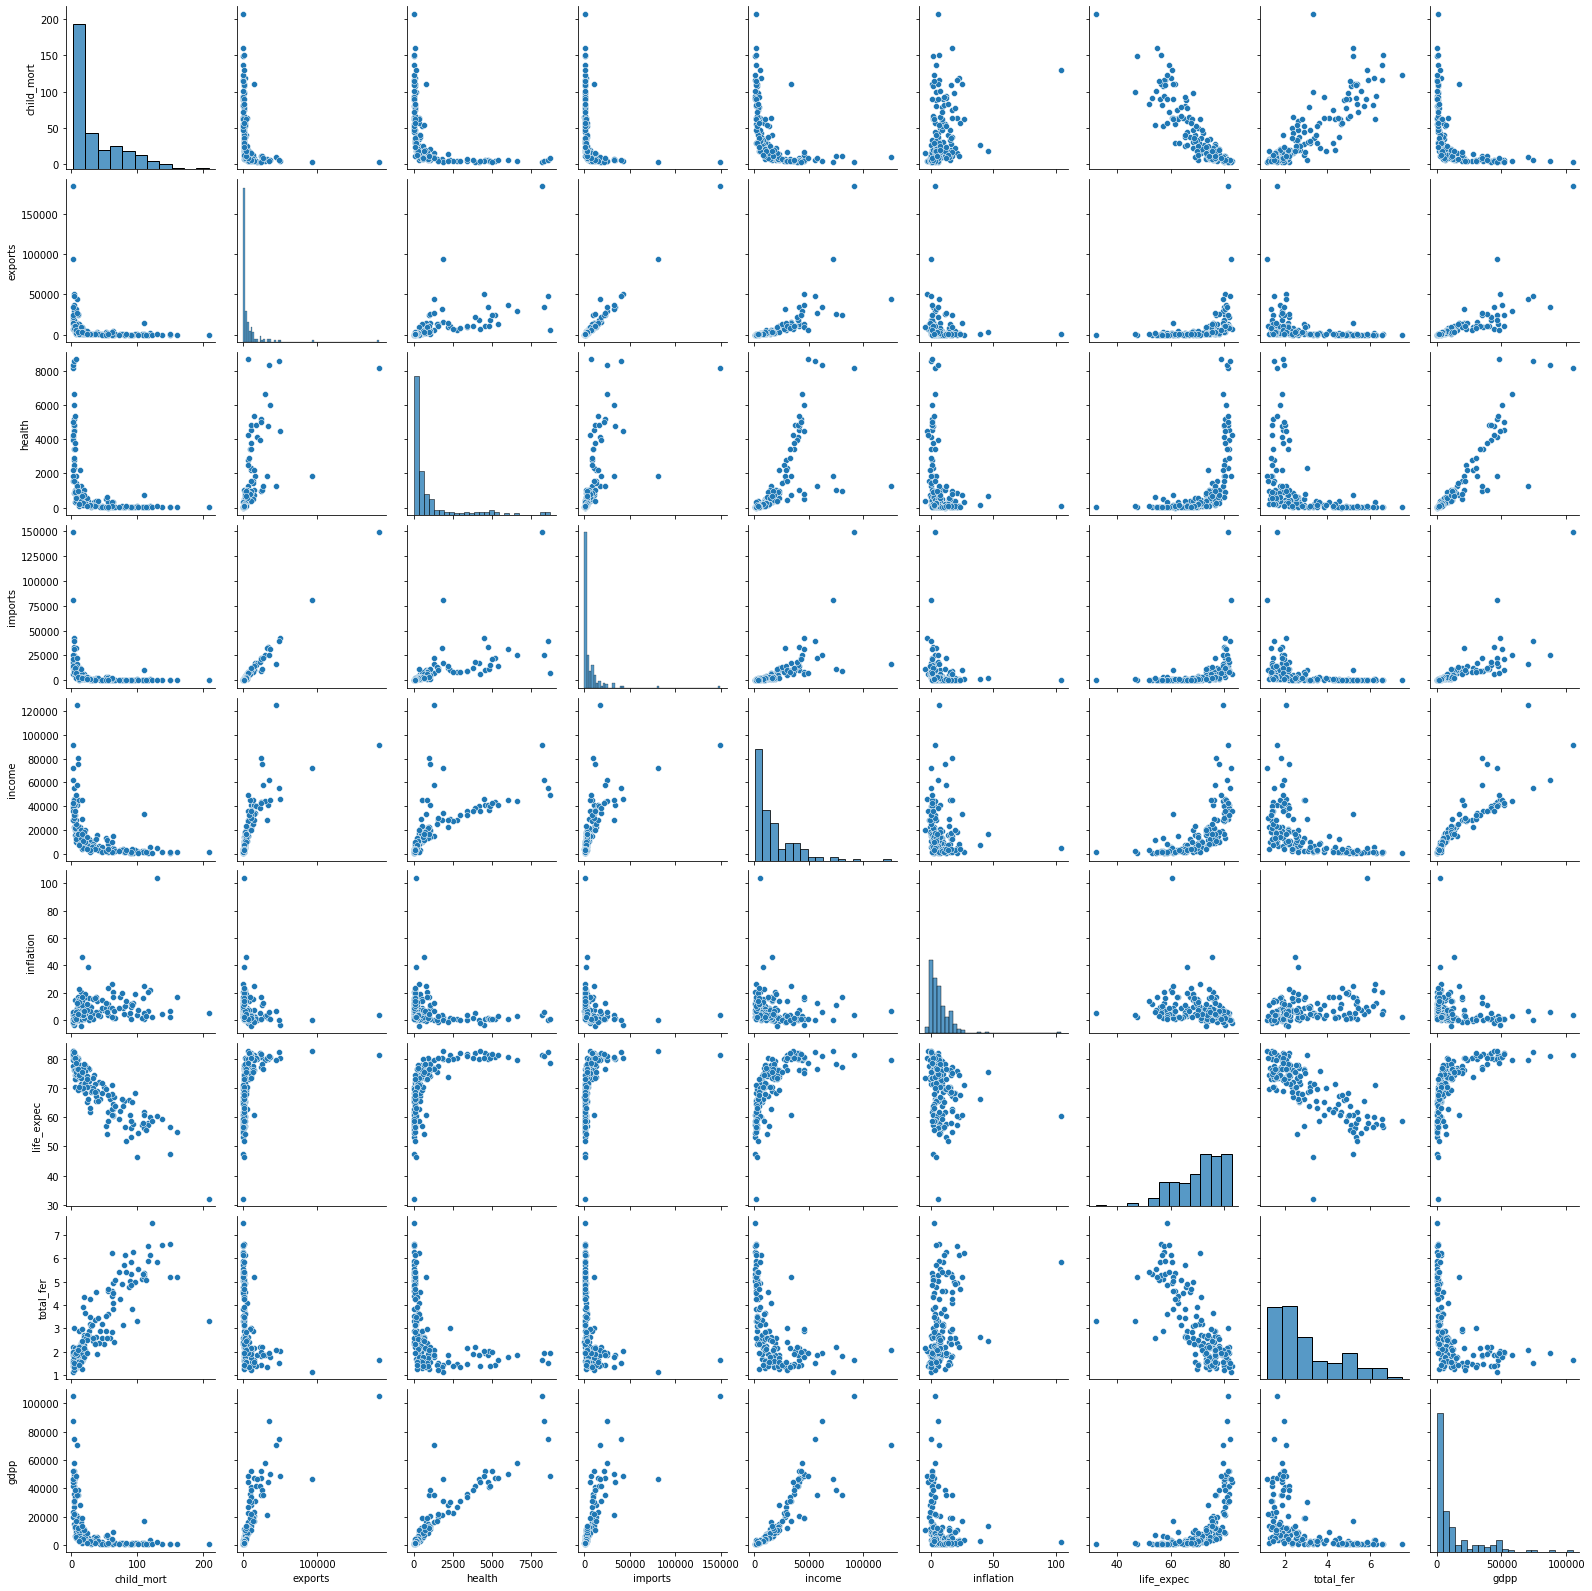

In [12]:
#visualizing the graph of all numeric columns correlation at on shot
sns.pairplot(df) 

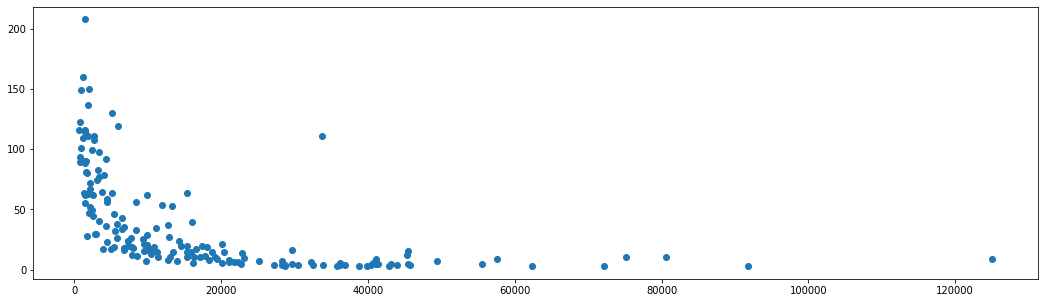

In [13]:
#scatterplot says relation betweeen 2 variables
plt.figure(figsize = (18, 5))
plt.scatter(x='income',y='child_mort',data=df)

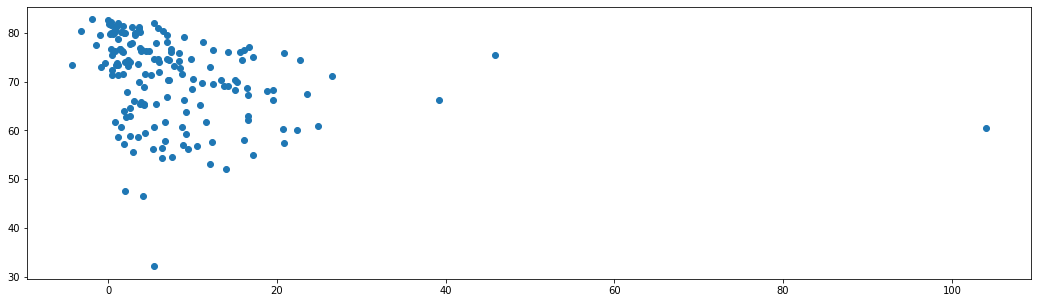

In [14]:
#scatterplot says relation betweeen 2 variables
plt.figure(figsize = (18, 5))
plt.scatter(x='inflation',y='life_expec',data=df)

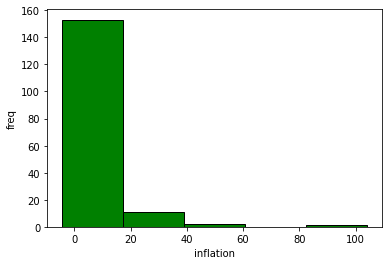

In [15]:
#histplot draws histogram for given variable with frequency
plt.hist(df['inflation'],5,histtype='bar',edgecolor='black',color='g')
plt.xlabel('inflation')
plt.ylabel('freq')
plt.show()

In [16]:
df.columns=df.columns
#df.columns are assigned

In [17]:
df.columns#printing columns of df

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

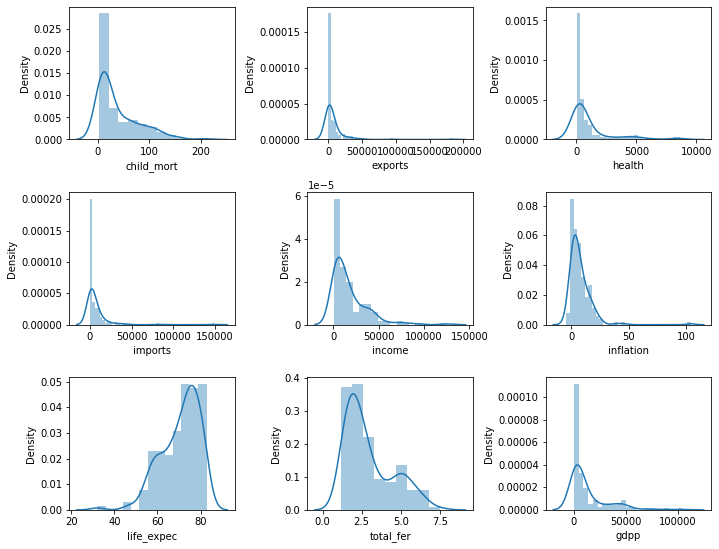

In [18]:
fig=plt.subplots(figsize=(10,15))
for i,feature in enumerate(df.drop('country',axis=1).columns):
    plt.subplot(6,3,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.distplot(df[feature])
    plt.tight_layout()
    #checking dist plot for numeric features

C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

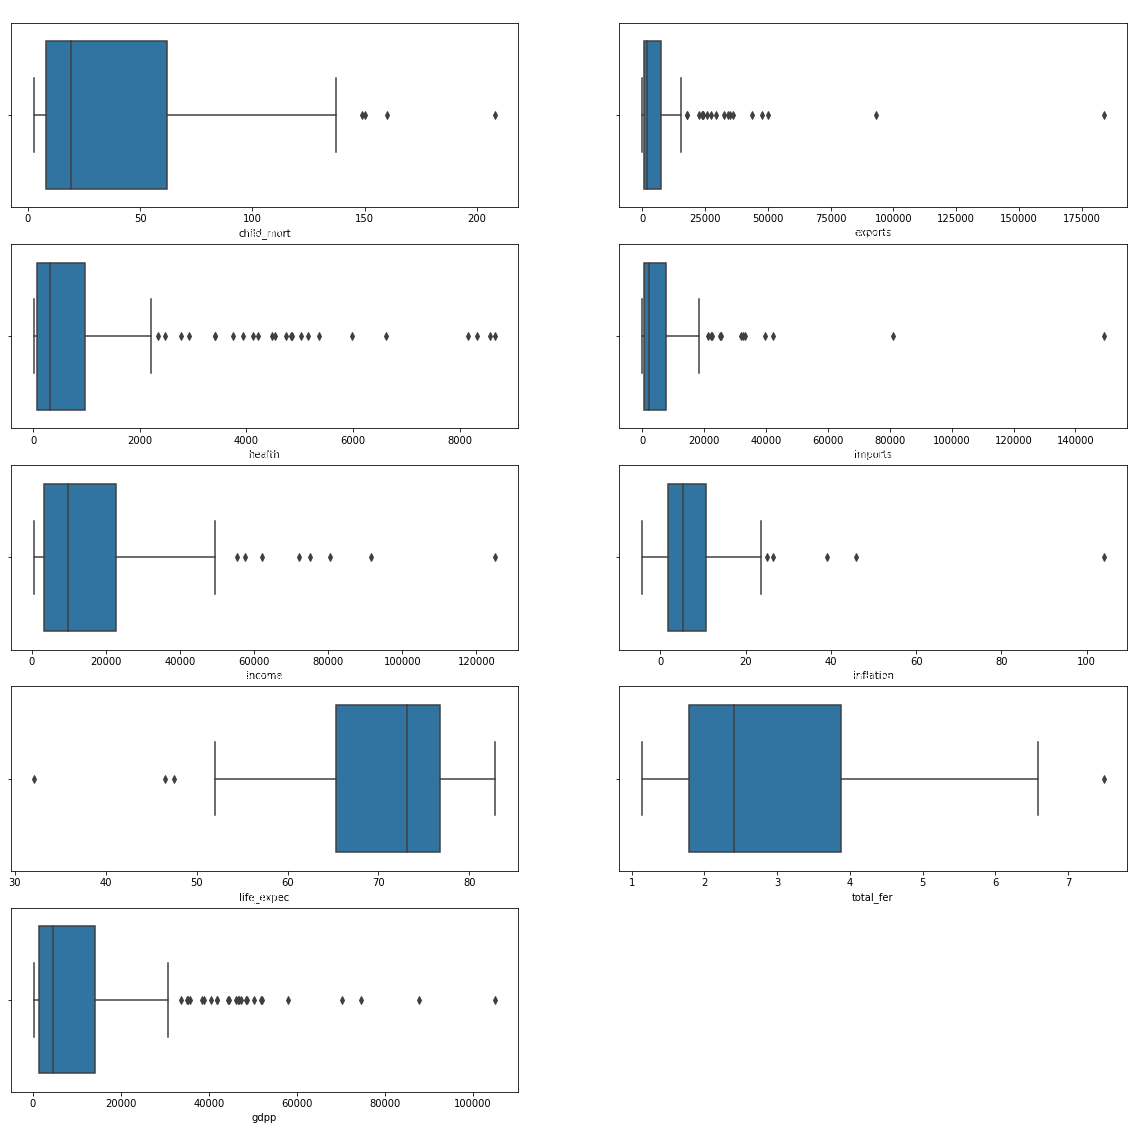

In [19]:
#checking outliers of all independent columns
j=1
plt.figure(figsize=(20,40))
col=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in col:
    plt.subplot(len(col)+1,2,j)
    sns.boxplot(df[i])
    plt.title(i,color='white')
    j=j+1
    #visualizing boxplot for numeric columns which represents the outliers of that particular column

# EDA

In [20]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
#quartile 1 quartile 3 values of df columns

In [21]:
Q1 #printing Q1 values of df columns

child_mort       8.2500
exports        447.1400
health          78.5355
imports        640.2150
income        3355.0000
inflation        1.8100
life_expec      65.3000
total_fer        1.7950
gdpp          1330.0000
Name: 0.25, dtype: float64

In [22]:
Q3#printing Q1 values of df columns

child_mort       62.10
exports        7278.00
health          976.94
imports        7719.60
income        22800.00
inflation        10.75
life_expec       76.80
total_fer         3.88
gdpp          14050.00
Name: 0.75, dtype: float64

In [23]:
IQR #inter quartile range of df columns

child_mort       53.8500
exports        6830.8600
health          898.4045
imports        7079.3850
income        19445.0000
inflation         8.9400
life_expec       11.5000
total_fer         2.0850
gdpp          12720.0000
dtype: float64

In [24]:
df.mean() #mean of df columns

C:\Users\MERINA ANGEL\AppData\Local\Temp\ipykernel_9392\499045928.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean() #mean of df columns


child_mort       38.270060
exports        7420.618847
health         1056.733204
imports        6588.352108
income        17144.688623
inflation         7.781832
life_expec       70.555689
total_fer         2.947964
gdpp          12964.155689
dtype: float64

In [25]:
df1=df.drop('country',axis=1) #dropping country column from df and assigning it to df1 variable

In [26]:
#removing outliers by replacing them eith mean 
for i in df1.columns:
    q1 , q3 =df1[i].quantile([0.25,0.75]) 
    iqr = q3-q1
    lf , uf = q1-1.5*iqr , q3+1.5*iqr
    df1[i] = np.where(df1[i] <lf ,df1[i].mean(),df1[i])
    df1[i] = np.where(df1[i] >uf ,df1[i].mean(),df1[i])
    
    
    #replacing the outliers with mean, which is beyond lower fence and upper fence

C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

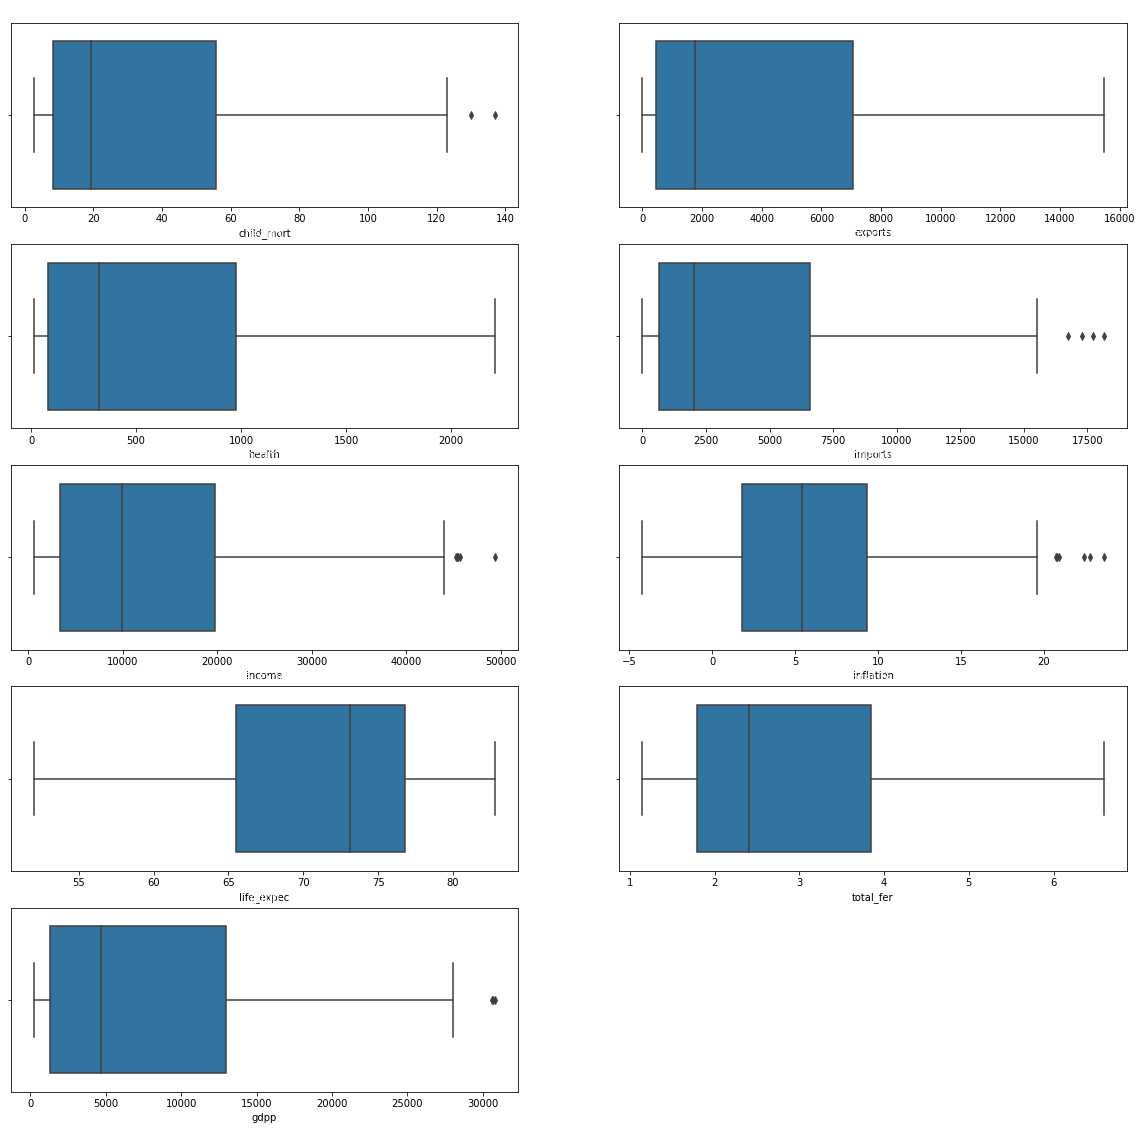

In [27]:
#checking outliers of all independent columns
j=1
plt.figure(figsize=(20,40))
col=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in col:
    plt.subplot(len(col)+1,2,j)
    sns.boxplot(df1[i])
    plt.title(i,color='white')
    j=j+1
    #checking outliers using boxplot 

In [28]:
y=df['country'] 

In [29]:
y#printing y (i.e country column)

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [30]:
#standardising the df1 variable
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler() #assigning standardscalar to scalar variable

scaled_features= scaler.fit_transform(df1)

In [31]:
#importing libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# PCA 
PCA means reducing the dimensionality of data.

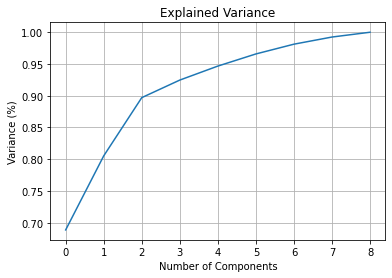

PC1       PC2       PC3
0 -3.531169  1.338167 -0.315297
1 -0.106481 -1.614102 -0.209965
2 -0.779823 -0.790575  1.601960
3 -3.490239  2.389875  1.763175
4  1.818064 -0.239527 -0.519753

In [32]:
from sklearn.decomposition import PCA #importing pca
pca = PCA()
X_pca = pca.fit_transform(scaled_features) #fitting and transforming the standardized data using pca

#visualizing the explained variance ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.grid() #formation of grid for graph
plt.show()

# Create principal components
pca = PCA(n_components=3) #3 features covers 97% of data
X_pca = pca.fit_transform(scaled_features)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])] #formation of features
X_pca = pd.DataFrame(X_pca, columns=component_names)#creating dataframe for those pc features

X_pca.head() #printing 5 rows

In [33]:
# Show dataframe sorted by PC2
idx = X_pca["PC2"].sort_values(ascending=False).index
cols = df1.columns
df1.loc[idx, cols]

child_mort    exports     health    imports   income  inflation  \
49        111.0  14671.800   766.0800  10071.900  33700.0   7.781832   
3         119.0   2199.190   100.6050   1514.370   5900.0  22.400000   
42          3.6  15461.600  1838.7600  17710.000  33900.0   2.010000   
37        116.0    137.274    26.4194    165.664    609.0  20.800000   
97        137.0    161.424    35.2584    248.508   1870.0   4.370000   
..          ...        ...        ...        ...      ...        ...   
34         15.7   1199.280   231.1920   1030.560   9530.0   6.940000   
6          18.1    669.760   141.6800   1458.660   6700.0   7.770000   
1          16.6   1145.200   267.8950   1987.740   9930.0   4.490000   
102        17.2    638.960   190.7100   1279.550   3910.0  11.100000   
20          6.9   1369.170   511.7100   2364.930   9720.0   1.400000   

     life_expec  total_fer     gdpp  
49         60.9       5.21  17100.0  
3          60.1       6.16   3530.0  
42         79.9       1.42  30800.0  
37         57.5       6.54    334.0  
97         59.5       6.55    708.0  
..          ...        ...      ...  
34         74.6       1.59   4560.0  
6          73.3       1.69   3220.0  
1          76.3       1.65   4090.0  
102        69.7       1.27   1630.0  
20         76.8       1.31   4610.0  

[167 rows x 9 columns]

In [34]:
explained_variance=pca.explained_variance_ratio_
explained_variance #explained variance ratio

array([0.68858675, 0.11663566, 0.09176812])

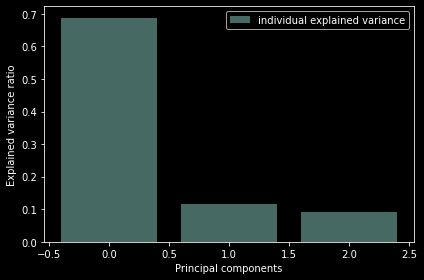

In [35]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(3), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
#explained variance ratio vs pc

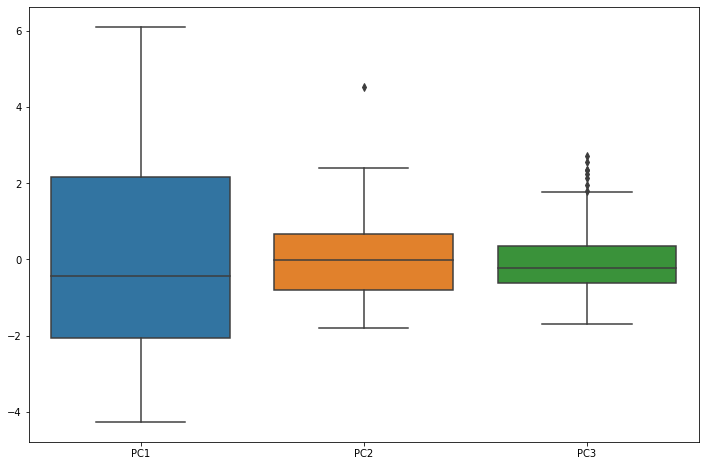

In [36]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=X_pca)
plt.show()
#printing boxplot for pc features

After implementing pca and doing kmeans and hierarchical will help to increase the accuracy of kmeans and hierarchical models

# k means

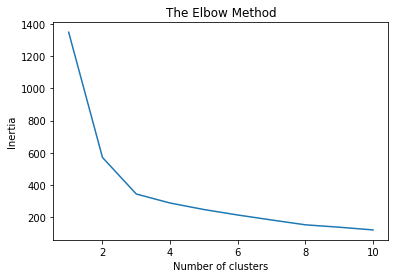

In [37]:
#elbow method==> this helps in knowing how many clusters to be formed
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 600, n_init = 10, random_state = 7)
    
    kmeans.fit(X_pca)
    
    cs.append(kmeans.inertia_)

# plot the elbow method graph for knowing number of clusters
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [38]:
# Calculate Silhoutte Score
import sklearn
score = sklearn.metrics.silhouette_score(X_pca, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.341


In [39]:
# finding silhouette score for different clusters values
for i in range(2,10):
    k_means = KMeans(n_clusters=i, max_iter = 300, init = 'k-means++',random_state = 0,n_init = 10)
    cluster_labels=k_means.fit_predict(X_pca)
    print(silhouette_score(X_pca, cluster_labels))

0.4915156341368341
0.4523045687796382
0.3641800740755204
0.3695124251485627
0.33305771186163985
0.3526874298480885
0.3559790764532396
0.36533891313915906


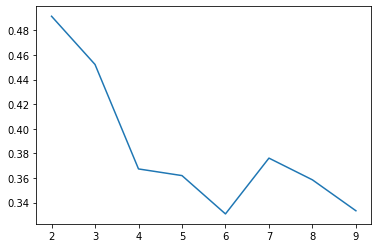

In [40]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(X_pca)
    sse_.append([k, silhouette_score(X_pca, kmeans.labels_)])
    
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()
#silhouette score graph

In [41]:
ssd = [] # An empty list for sum of squared distances to be appended for k values 2 to 10

for k in range(2,11):
    model = KMeans(n_clusters=k)
    model.fit(X_pca)
    ssd.append(model.inertia_)
    # model.inertia_: Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided 
    # (from documentation - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [54]:
model = KMeans(n_clusters=3) #no. of clusters= 3
model.fit(scaled_features)

k_means_labels = model.fit_predict(X_pca)
k_means_labels

array([2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2,
       2, 0, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0,
       2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [55]:
model.inertia_ #inertia -->it should be minimum as much as possible

344.4151750150594

In [56]:
range_n_clusters=[1,2,3,4,5,6,7,8,9,10]

For n_clusters = 2 The average silhouette_score is : 0.4915156341368341
For n_clusters = 3 The average silhouette_score is : 0.4523045687796382
For n_clusters = 4 The average silhouette_score is : 0.3661167171483697
For n_clusters = 6 The average silhouette_score is : 0.3254753340986423
For n_clusters = 8 The average silhouette_score is : 0.36039184694500537
For n_clusters = 10 The average silhouette_score is : 0.3423113217517925
For n_clusters = 14 The average silhouette_score is : 0.32165240875961587
For n_clusters = 17 The average silhouette_score is : 0.3321096817074923
For n_clusters = 19 The average silhouette_score is : 0.3405701437336835
For n_clusters = 22 The average silhouette_score is : 0.3386941589882622
For n_clusters = 24 The average silhouette_score is : 0.3469983497144465
For n_clusters = 26 The average silhouette_score is : 0.32075268466246293
For n_clusters = 27 The average silhouette_score is : 0.34165030762715365


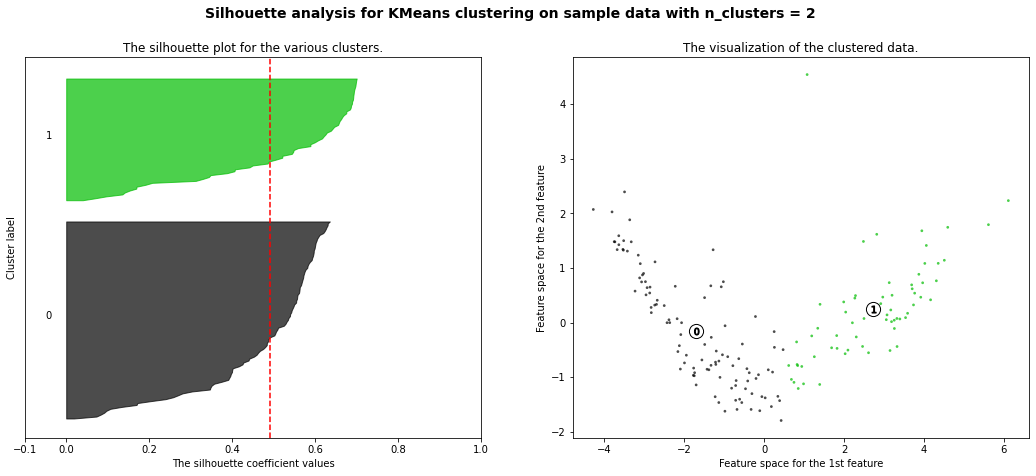

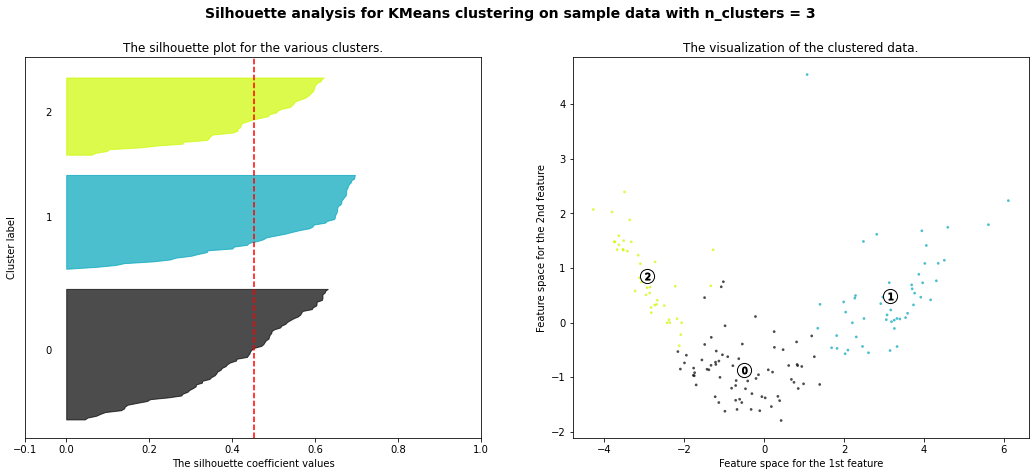

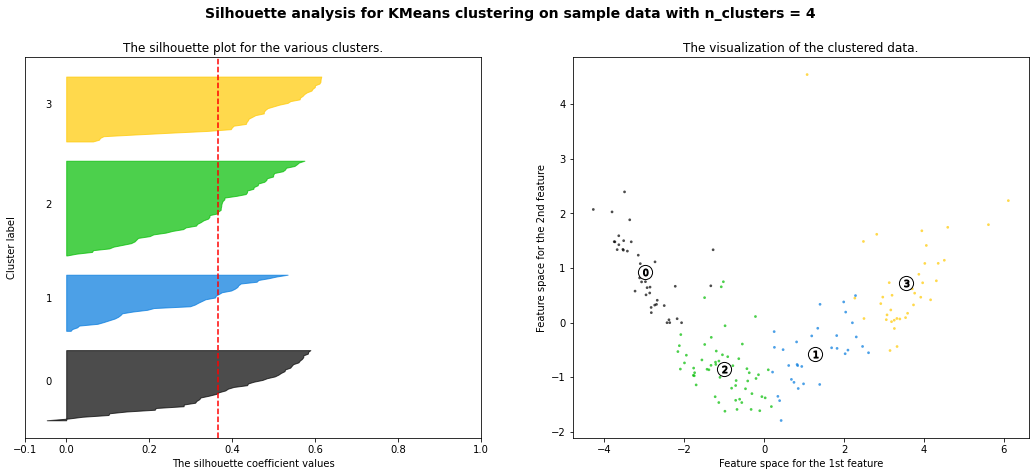

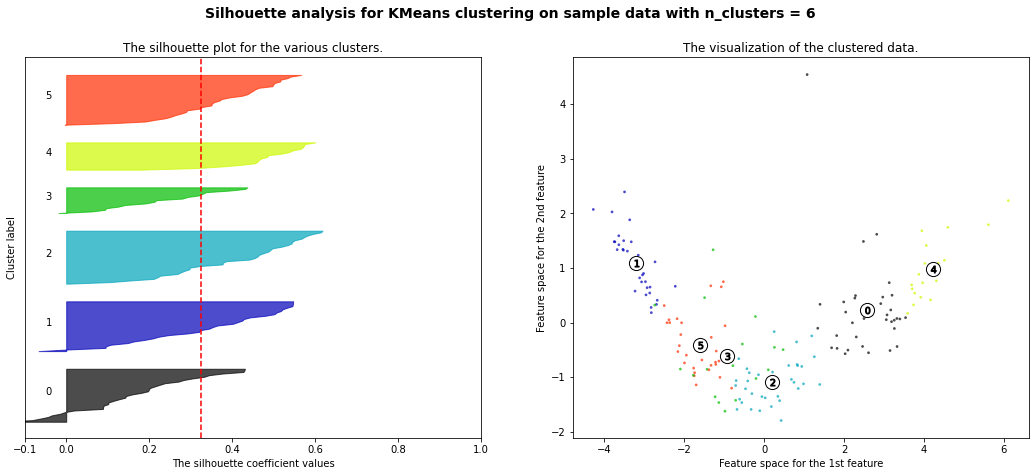

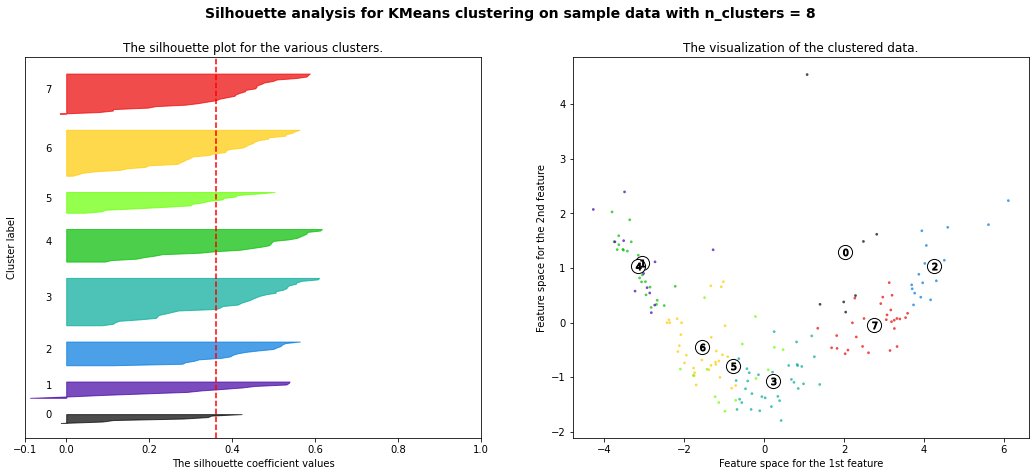

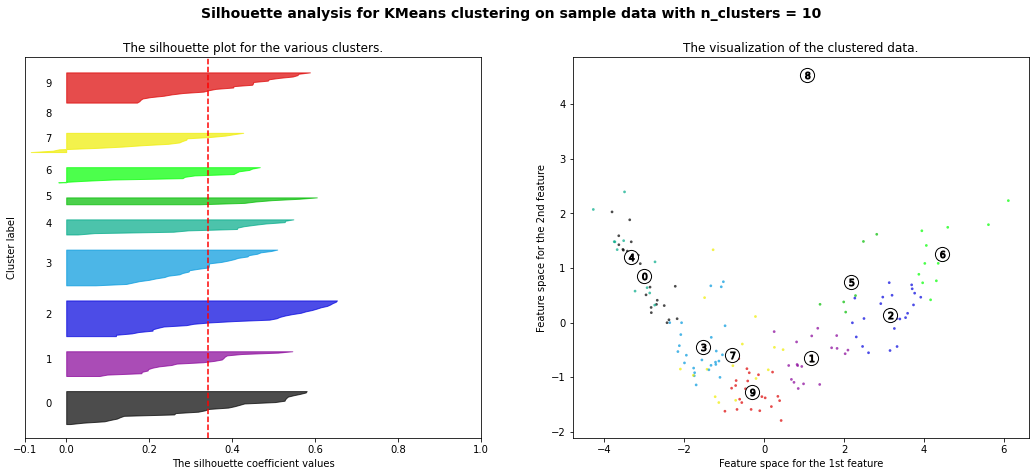

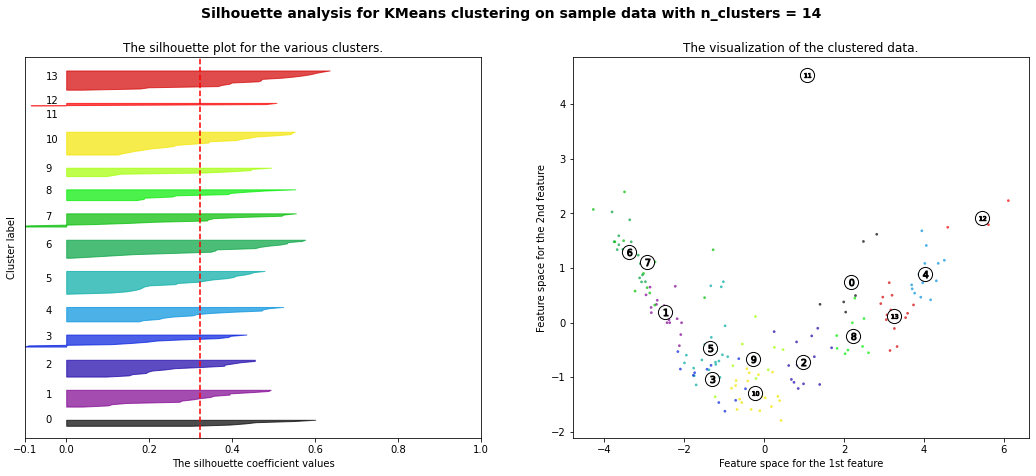

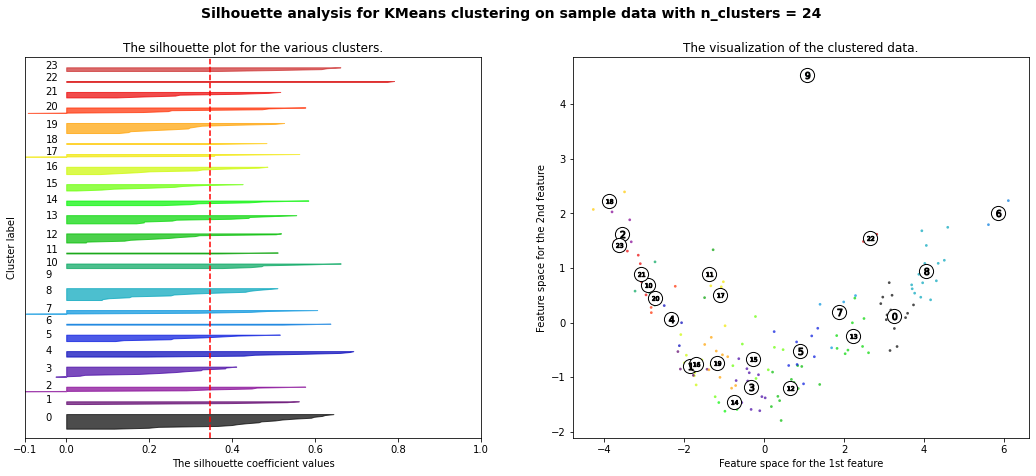

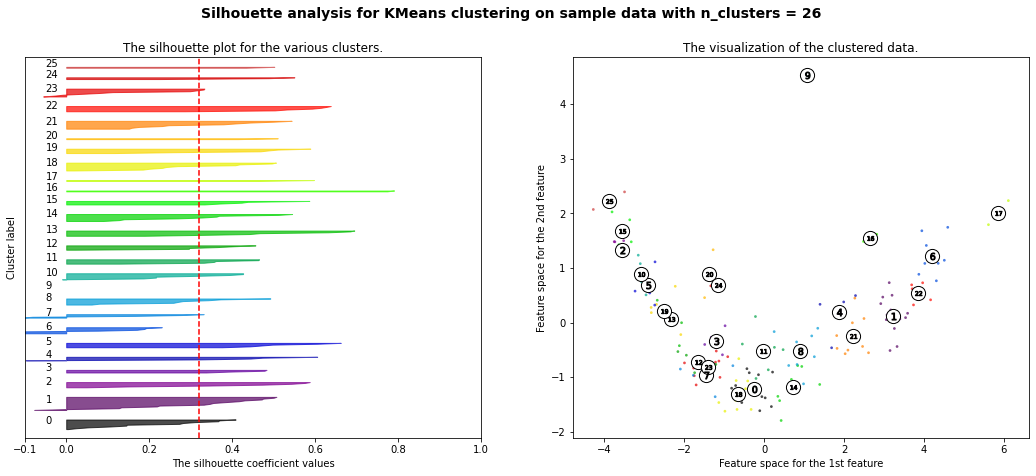

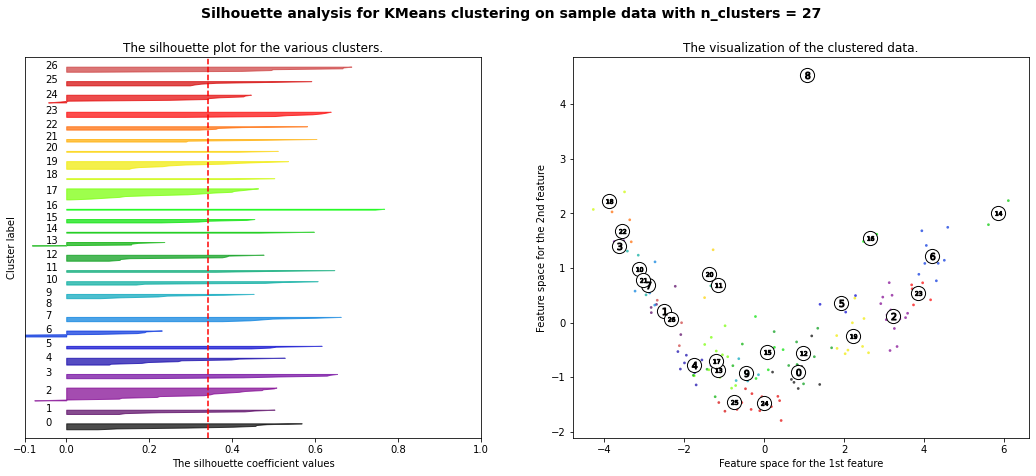

In [57]:
# visualizing the silhouette score scatter plots of cluster data
X=X_pca
import matplotlib.cm as cm 

range_n_clusters = [2,3,4,6,8,10, 14,17, 19,22,24,26,27]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca['PC1'],X_pca['PC2'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### selecting 3 clusters as k.As it have less outliers in above graph, which can be taken as perfect clusters for given data. 

### so we can say that we will use pca with kmeans to form cluster by reducing the dimensions and cluster = 2,3,4 can be taken and mostly it is better to take 3 in this business case

In [58]:
# concatinating the clustering labels with dataframe
country_df_clustered = df.iloc[:,:]
country_df_clustered = pd.concat([df, pd.DataFrame(k_means_labels, columns=['cluster_id_km'])], axis = 1)
country_df_clustered.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_id_km  
0       9.44        56.2       5.82    553              2  
1       4.49        76.3       1.65   4090              1  
2      16.10        76.5       2.89   4460              1  
3      22.40        60.1       6.16   3530              2  
4       1.44        76.8       2.13  12200              0

In [59]:
#df2=pd.DataFrame(k_means_labels)

In [60]:
#df2.value_counts() #checking value counts

In [61]:
#cluster formation based on country 
print("Cluster 0 of K_means Clustering model : ")
print(country_df_clustered[country_df_clustered['cluster_id_km'] == 0].country.unique())
print('\n')

print("Cluster 1 of K_means Clustering model : ")
print(country_df_clustered[country_df_clustered['cluster_id_km'] == 1].country.unique())
print('\n')


print("Cluster 2 of K_means Clustering model : ")
print(country_df_clustered[country_df_clustered['cluster_id_km'] == 2].country.unique())
print('\n')

Cluster 0 of K_means Clustering model : 
['Antigua and Barbuda' 'Australia' 'Austria' 'Bahamas' 'Bahrain'
 'Barbados' 'Belgium' 'Brunei' 'Canada' 'Chile' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Equatorial Guinea' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Kuwait' 'Latvia' 'Libya' 'Lithuania' 'Luxembourg'
 'Malaysia' 'Malta' 'Netherlands' 'New Zealand' 'Norway' 'Oman' 'Poland'
 'Portugal' 'Qatar' 'Saudi Arabia' 'Seychelles' 'Singapore'
 'Slovak Republic' 'Slovenia' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'United Arab Emirates' 'United Kingdom' 'United States']


Cluster 1 of K_means Clustering model : 
['Albania' 'Algeria' 'Argentina' 'Armenia' 'Azerbaijan' 'Bangladesh'
 'Belarus' 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Bulgaria' 'Cambodia' 'Cape Verde' 'China' 'Colombia'
 'Costa Rica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Fiji'
 'Georgia' 'Grenada' 'Guatemala'

# HIERARCHICAL CLUSTERING

In [62]:
#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(scaled_features, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show() 

In [63]:
#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(X_pca, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show()

#### another way of hierarchical clustering representation

In [64]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0) # each point starts as its own cluster
# From sklearn documentation: 
# distance_thresholdfloat, default=None
# The linkage distance threshold above which, clusters will not be merged. If not None, n_clusters must be None and compute_full_tree must be True.

In [65]:
cluster_labels = model.fit_predict(scaled_features)
cluster_labels # each point gets its own label since distance_threshold=0 in the above cell

array([157, 154, 127,  92, 108,  93, 158, 140, 159, 160, 143, 139, 131,
       141,  94, 163, 111, 106, 125, 120, 138, 115, 161,  90, 156,  69,
       137,  96,  79, 103, 162, 129,  95, 153, 142, 121, 123, 107,  87,
       104, 117,  80, 109, 118, 110, 135, 152, 130, 134, 105, 144, 150,
       147,  70, 166, 124,  51,  71, 136,  99, 126,  54, 151,  75, 155,
        47, 133, 102,  78,  77,  58, 165, 132,  46,  89,  52,  61,  53,
        88,  62, 164,  97,  98,  66, 119,  59, 122, 116, 113,  60,  48,
        76,  67,  81, 149, 101, 112,  25,  68, 128,  83,  57,  33,  64,
        29,  74,  65, 114,  34, 148,  82,  23,  43,  56,  26,  84,  32,
        39,  63,  86,  28, 145,  44,  16,  30,  73, 100, 146,  72,  35,
        49,  85,  91,  38,  40,  45,  19,  55,  37,  18,  31,  41,  14,
        15,  42,  50,  22,  12,  24,  36,  20,  17,  21,  27,  13,   9,
        10,   4,   8,  11,   5,   7,   3,   6,   2,   1,   0], dtype=int64)

In [66]:
from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix[:][:5] # display only 5 rows
# format: point 1, point 2, distance between the points, number of points in the cluster

array([[  7.        ,  26.        ,   1.41421356,   2.        ],
       [ 42.        ,  61.        ,   1.41421356,   2.        ],
       [ 48.        , 112.        ,   1.41421356,   2.        ],
       [158.        , 160.        ,   1.41421356,   2.        ],
       [117.        , 142.        ,   1.41421356,   2.        ]])

In [67]:
plt.figure(figsize=(30,10))
hierarchy.set_link_color_palette(['r','grey', 'b', 'grey', 'm', 'grey', 'g', 'grey', 'orange']) # set colors for the clusters
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='level',p=15, color_threshold=15) # color_threshold=23 sets clusters below y-axis value of 23 to be of the same color

In [68]:
model = AgglomerativeClustering(n_clusters=3) #agglomerative clustering assigning to model variable

In [69]:
cluster_id_hc=model.fit_predict(scaled_features) #fitting and predicting scaled data

In [70]:
model.labels_ #finding labels

array([2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1,
       0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1,
       2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 0,
       1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2], dtype=int64)

In [71]:
country_df_clustered2 = pd.concat([df['country'],df1, pd.DataFrame(cluster_id_hc, columns=['cluster_id_hc'])], axis = 1)
#assigning to country_df_clustered2 variable

In [72]:
country_df_clustered.head() #printing 5 rows of kmeans addded values

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_id_km  
0       9.44        56.2       5.82    553              2  
1       4.49        76.3       1.65   4090              1  
2      16.10        76.5       2.89   4460              1  
3      22.40        60.1       6.16   3530              2  
4       1.44        76.8       2.13  12200              0

In [73]:
country_df_clustered2.head() #printing 5 rows of hierarchical addded values

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer     gdpp  cluster_id_hc  
0       9.44        56.2       5.82    553.0              2  
1       4.49        76.3       1.65   4090.0              1  
2      16.10        76.5       2.89   4460.0              1  
3      22.40        60.1       6.16   3530.0              2  
4       1.44        76.8       2.13  12200.0              0

In [74]:
country_df_clustered2=country_df_clustered2.drop(['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'],axis=1)

In [75]:
df2=pd.DataFrame(country_df_clustered2) #converting to dataframe

In [76]:
df2 #printing df2

cluster_id_hc
0                2
1                1
2                1
3                2
4                0
..             ...
162              1
163              0
164              1
165              2
166              2

[167 rows x 1 columns]

In [77]:
df #printing df

country  child_mort  exports    health   imports  income  \
0            Afghanistan        90.2    55.30   41.9174   248.297    1610   
1                Albania        16.6  1145.20  267.8950  1987.740    9930   
2                Algeria        27.3  1712.64  185.9820  1400.440   12900   
3                 Angola       119.0  2199.19  100.6050  1514.370    5900   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
..                   ...         ...      ...       ...       ...     ...   
162              Vanuatu        29.2  1384.02  155.9250  1565.190    2950   
163            Venezuela        17.1  3847.50  662.8500  2376.000   16500   
164              Vietnam        23.3   943.20   89.6040  1050.620    4490   
165                Yemen        56.3   393.00   67.8580   450.640    4480   
166               Zambia        83.1   540.20   85.9940   451.140    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [78]:
# concatinating the clustering labels with dataframe
country_df_clustered = df.iloc[:,:]
km = pd.concat([df, pd.DataFrame(k_means_labels, columns=['cluster_id_km'])], axis = 1)
country_df_clustered = pd.concat([km, pd.DataFrame(model.labels_, columns=['cluster_id_hc'])], axis = 1)
country_df_clustered.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_id_km  cluster_id_hc  
0       9.44        56.2       5.82    553              2              2  
1       4.49        76.3       1.65   4090              1              1  
2      16.10        76.5       2.89   4460              1              1  
3      22.40        60.1       6.16   3530              2              2  
4       1.44        76.8       2.13  12200              0              0

In [79]:
import plotly.express as px #visualization in 3d format
fig = px.scatter_3d(country_df_clustered, x='country', y='cluster_id_km', z='cluster_id_hc', color=model.fit_predict(scaled_features), opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside")) 
# fig.update_layout is being used to make the 'color' legend shift towards left side, otherwise the 'color' and 'Gender_Male' legends overlap
# fig.show()

In [80]:
import plotly.express as px #visualization in 3d format
fig = px.scatter_3d(country_df_clustered, x='child_mort', y='exports', z='country', color=model.fit_predict(scaled_features), opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside")) 
# fig.update_layout is being used to make the 'color' legend shift towards left side, otherwise the 'color' and 'Gender_Male' legends overlap
# fig.show()

In [81]:
# visualising clusters using km, hc values as hue
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data= country_df_clustered, hue = 'cluster_id_km', palette="bright")
plt.subplot(1,3,2)
sns.scatterplot(x = 'income', y = 'child_mort', data= country_df_clustered, hue = 'cluster_id_km', palette="bright")
plt.subplot(1,3,3)
sns.scatterplot(x = 'income', y = 'gdpp', data= country_df_clustered, hue = 'cluster_id_hc', palette="bright")
plt.tight_layout()

plt.show()

In [82]:
# sort based on 'child_mort','income','gdpp' in respective order
top5 = country_df_clustered.sort_values(by = ['gdpp','income','child_mort'],
                                                     ascending=[True, True, False]).head(5)
top5 = top5[['country','gdpp','income','child_mort']]
top5 #printing top 5 values of country, income, child_mort columns according to their values

country  gdpp  income  child_mort
26            Burundi   231     764        93.6
88            Liberia   327     700        89.3
37   Congo, Dem. Rep.   334     609       116.0
112             Niger   348     814       123.0
132      Sierra Leone   399    1220       160.0

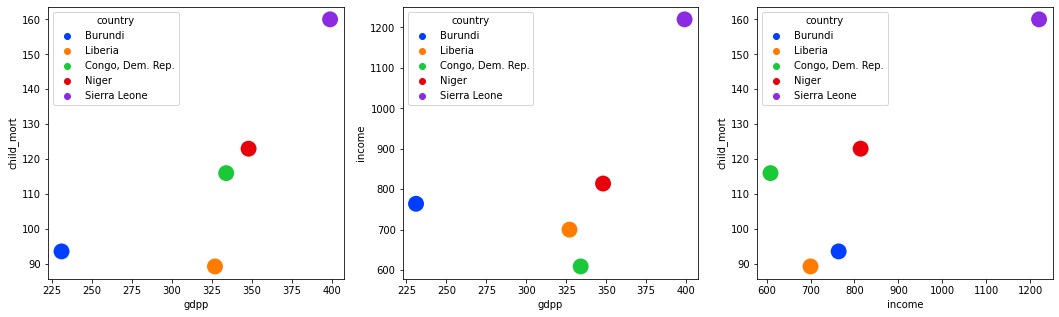

In [83]:
# scatter plot for bottom 5 countries based on profiling varibles
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='country',
                data=top5, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 2)
sns.scatterplot(x='gdpp', y='income', hue='country',
                data=top5, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 3)
sns.scatterplot(x='income', y='child_mort', hue='country',
                data=top5, legend='full', palette="bright", s=300, c='lightblue')
plt.show() 
#visualising the top5 values using hue as country 

# DBSCAN

In [84]:
from sklearn.cluster import DBSCAN #importin dbscan library

drawing elbow method graph in % between outlier points and epsilon to get the resonable value for epsilon

In [85]:
outlier_percent = [] 

for eps in np.linspace(0.001,3,50): # check 50 values of epsilon between 0.001 and 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=8)
    dbscan.fit(scaled_features)
   
    # Percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

In [86]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent, color='red')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");
#epsilon vs oultiers

In [87]:
dbscan = DBSCAN(eps=1.1,min_samples=8)
dbscan.fit(scaled_features) #fitting scaled data

DBSCAN(eps=1.1, min_samples=8)

In [88]:
dbscan_labels=dbscan.labels_#finding labels using dbscan

In [89]:
dbscan_labels=pd.DataFrame(dbscan_labels)#converting to dataframe

In [90]:
dbscan_labels.value_counts()#checking value counts

-1    73
 1    56
 0    25
 2    13
dtype: int64

In [91]:
  score = silhouette_score(scaled_features, dbscan_labels)#performing silhouette score

C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [92]:
score #printing score

0.12282433720757358

In [93]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['exports'], y=df['imports'], hue=dbscan.labels_, palette='viridis'); #visualizing scatter plot

In [94]:
dbscan = DBSCAN(eps=1.1,min_samples=8)
dbscan.fit(X_pca)#fitting pca features into dbscan

DBSCAN(eps=1.1, min_samples=8)

In [95]:
  score = silhouette_score(X_pca, dbscan_labels) #checking silhouette score

C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [96]:
score

0.09515643255791717

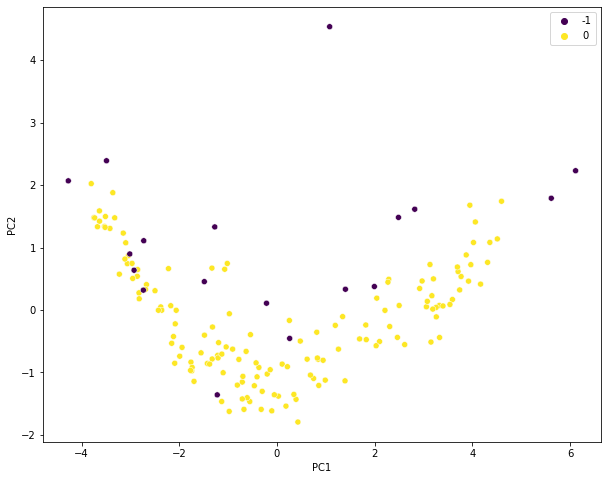

In [97]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2',data=X_pca, hue=dbscan.labels_, palette='viridis');#visualizing scatter plot

In [98]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features) #using nneighbours we will know the nearest values

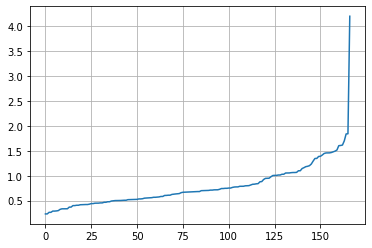

In [99]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()
#Lets plot the distances of each point in ascending order of the distance, elbow point will give us the samller range for optimal eps value.

In [100]:
min_samples = range(10,20)
eps = np.arange(1.2,2.0,0.1) # returns array of ranging from 1.0 to 1.5 with step of 0.1

In [101]:
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(X_pca).labels_
        print(labels)
        score = silhouette_score(X_pca, labels)
        output.append((ms, ep, score))
        #values of output were printed using append()

[ 0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0 -1  0  0  0  0  0
  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0 -1  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0]
[ 0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [102]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}") #Get the parameters for best silhouette score

Best silhouette_score: 0.38111320835438417
min_samples: 19
eps: 1.9000000000000006


In [103]:
from collections import Counter

In [104]:
labels = DBSCAN(min_samples=19, eps = 1.9).fit(X_pca).labels_
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette_score: {silhouette_score(X_pca, labels)}")

Number of clusters: 2
Number of outliers: 2
Silhouette_score: 0.38111320835438417


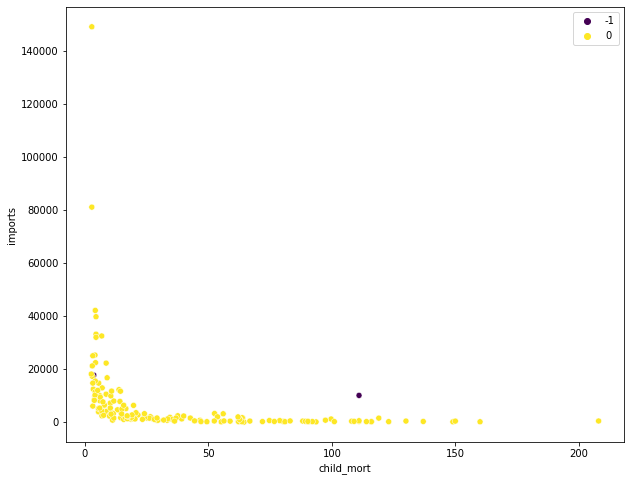

In [105]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['child_mort'], y=df['imports'], hue=labels, palette='viridis');

In [106]:
#cluster formation based on country 
print("Cluster 0 of K_means Clustering model : ")
print(country_df_clustered[country_df_clustered['cluster_id_km'] == 0].country.unique())
print('\n')

print("Cluster 1 of K_means Clustering model : ")
print(country_df_clustered[country_df_clustered['cluster_id_km'] == 1].country.unique())
print('\n')


print("Cluster 2 of K_means Clustering model : ")
print(country_df_clustered[country_df_clustered['cluster_id_km'] == 2].country.unique())
print('\n')

Cluster 0 of K_means Clustering model : 
['Antigua and Barbuda' 'Australia' 'Austria' 'Bahamas' 'Bahrain'
 'Barbados' 'Belgium' 'Brunei' 'Canada' 'Chile' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Equatorial Guinea' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Kuwait' 'Latvia' 'Libya' 'Lithuania' 'Luxembourg'
 'Malaysia' 'Malta' 'Netherlands' 'New Zealand' 'Norway' 'Oman' 'Poland'
 'Portugal' 'Qatar' 'Saudi Arabia' 'Seychelles' 'Singapore'
 'Slovak Republic' 'Slovenia' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'United Arab Emirates' 'United Kingdom' 'United States']


Cluster 1 of K_means Clustering model : 
['Albania' 'Algeria' 'Argentina' 'Armenia' 'Azerbaijan' 'Bangladesh'
 'Belarus' 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Bulgaria' 'Cambodia' 'Cape Verde' 'China' 'Colombia'
 'Costa Rica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Fiji'
 'Georgia' 'Grenada' 'Guatemala'

In [107]:
#cluster formation based on country 
print("Cluster 0 of hierarchical Clustering model : ")
print(country_df_clustered[country_df_clustered['cluster_id_hc'] == 0].country.unique())
print('\n')

print("Cluster 1 of hierarchical Clustering model : ")
print(country_df_clustered[country_df_clustered['cluster_id_hc'] == 1].country.unique())
print('\n')


print("Cluster 2 of hierarchical Clustering model : ")
print(country_df_clustered[country_df_clustered['cluster_id_hc'] == 2].country.unique())
print('\n')

Cluster 0 of hierarchical Clustering model : 
['Antigua and Barbuda' 'Australia' 'Austria' 'Bahamas' 'Bahrain'
 'Barbados' 'Belgium' 'Brazil' 'Brunei' 'Bulgaria' 'Canada' 'Chile'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Equatorial Guinea' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kuwait' 'Latvia'
 'Lebanon' 'Libya' 'Lithuania' 'Luxembourg' 'Malaysia' 'Maldives' 'Malta'
 'Mauritius' 'Montenegro' 'Netherlands' 'New Zealand' 'Norway' 'Oman'
 'Panama' 'Poland' 'Portugal' 'Qatar' 'Romania' 'Saudi Arabia'
 'Seychelles' 'Singapore' 'Slovak Republic' 'Slovenia' 'South Korea'
 'Spain' 'Sweden' 'Switzerland' 'Turkey' 'United Arab Emirates'
 'United Kingdom' 'United States' 'Uruguay' 'Venezuela']


Cluster 1 of hierarchical Clustering model : 
['Albania' 'Algeria' 'Argentina' 'Armenia' 'Azerbaijan' 'Bangladesh'
 'Belarus' 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana'
 'Cambodia' 'Cape Verde' 'Cen

In [108]:
country_df_clustered

country  child_mort  exports    health   imports  income  \
0            Afghanistan        90.2    55.30   41.9174   248.297    1610   
1                Albania        16.6  1145.20  267.8950  1987.740    9930   
2                Algeria        27.3  1712.64  185.9820  1400.440   12900   
3                 Angola       119.0  2199.19  100.6050  1514.370    5900   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
..                   ...         ...      ...       ...       ...     ...   
162              Vanuatu        29.2  1384.02  155.9250  1565.190    2950   
163            Venezuela        17.1  3847.50  662.8500  2376.000   16500   
164              Vietnam        23.3   943.20   89.6040  1050.620    4490   
165                Yemen        56.3   393.00   67.8580   450.640    4480   
166               Zambia        83.1   540.20   85.9940   451.140    3280   

     inflation  life_expec  total_fer   gdpp  cluster_id_km  cluster_id_hc  
0         9.44        56.2       5.82    553              2              2  
1         4.49        76.3       1.65   4090              1              1  
2        16.10        76.5       2.89   4460              1              1  
3        22.40        60.1       6.16   3530              2              2  
4         1.44        76.8       2.13  12200              0              0  
..         ...         ...        ...    ...            ...            ...  
162       2.62        63.0       3.50   2970              1              1  
163      45.90        75.4       2.47  13500              1              0  
164      12.10        73.1       1.95   1310              1              1  
165      23.60        67.5       4.67   1310              2              2  
166      14.00        52.0       5.40   1460              2              2  

[167 rows x 12 columns]

# This are the clusters formed for countries with the help of pca, kmeans,hierarchical.
They are :-(AS PER CLUSTERING REPRESENTATION)

    under-Developed countries  (CLUSTER 2),
    
    Developing countries (CLUSTER 1),  
    
    developed countries (CLUSTER 0)

# Conclusions:

1. Here, according to less child_mort rate, high gdpp we can say 1st CLUSTER (i.e cluster 0) as a developed countries.


2. Remaining 2nd CLUSTER is considered as developing country (i.e cluster 1)


3. With less gdpp, high child_mort rate compared to other countries are considered as 3rd CLUSTER (i.e cluster 2) represented as under developed countries and this countries require help from international humanitarian NGO 




cluster 2 are the under developed countries require help from international humanitarian NGO.